<h2>Problem Set 4</h2>
<p>MACS 30100, Dr. Evans<br>
Due Monday, Feb. 6 at 11:30am<br>
William L. Guzman 
</p>

In [1]:
# Import packages and load the data
import os
import numpy as np
import numpy.random as rnd
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

os.chdir('C:/Users/Walle/Documents/Python')

pts = np.loadtxt('incomes.txt')

<h2>Part 1: Some income data, lognormal distribution, and SMM (10 points).</h2>
<h4>a. Plot a histogram </h4>

In [7]:
#Plot the Histogram 
count, bins, ignored = plt.hist(pts, 30, normed=True)
plt.title('Annual Income for Students', fontsize=20)
plt.xlabel('Income')
plt.ylabel('Percent of Students')
plt.xlim([45000, 140000]) 

(45000, 140000)

<h4>b. Write your own function for the lognormal PDF</h4>

In [2]:
#Definig the function 
def LN_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    
    # No cutoffs: truncated normal = normal
    if (cut_lb == None) & (cut_ub == None):
        cut_ub_cdf = 1.0
        cut_lb_cdf = 0.0
        
    # Lower bound truncation, no upper bound truncation
    elif (cut_lb != None) & (cut_ub == None):
        cut_ub_cdf = 1.0
        cut_lb_cdf = sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
        
    # Upper bound truncation, no lower bound truncation
    elif (cut_lb == None) & (cut_ub != None):
        cut_ub_cdf = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
        cut_lb_cdf = 0.0
        
    # Lower bound and upper bound truncation
    elif (cut_lb != None) & (cut_ub != None):
        cut_ub_cdf = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
        cut_lb_cdf = sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    
    pdf_vals = (sts.norm.pdf(xvals, loc=mu, scale=sigma) /
                (cut_ub_cdf - cut_lb_cdf))
    
    return pdf_vals

In [3]:
#Run the function
xvals = np.array([[200.0, 270.0], [180.0,195.5]])

mu = 5.0 
sig = 1.0
cut_lb_1 = 0
cut_ub_1 = 300

LN_pdf(xvals, mu, sig, cut_lb_1, cut_ub_1)



array([[ 0.,  0.],
       [ 0.,  0.]])

<h4>c. Estimate the parameters of the lognormal distribution by simulated method
of moments (SMM).</h4>

In [4]:
#Function that draws the samples. 
def trunc_norm_draws(unif_vals, mu, sigma, cut_lb, cut_ub):
    if (cut_lb == None) & (cut_ub == None):
        cut_ub_cdf = 1.0
        cut_lb_cdf = 0.0
        
    # Lower bound truncation, no upper bound truncation
    elif (cut_lb != None) & (cut_ub == None):
        cut_ub_cdf = 1.0
        cut_lb_cdf = sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
        
    # Upper bound truncation, no lower bound truncation
    elif (cut_lb == None) & (cut_ub != None):
        cut_ub_cdf = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
        cut_lb_cdf = 0.0
        
    # Lower bound and upper bound truncation
    elif (cut_lb != None) & (cut_ub != None):
        cut_ub_cdf = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
        cut_lb_cdf = sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    
    unif2_vals = unif_vals * (cut_ub_cdf - cut_lb_cdf) + cut_lb_cdf
    tnorm_draws = sts.norm.ppf(unif2_vals, loc=mu, scale=sigma)
    
    return tnorm_draws


In [5]:
#Data Moments Functions
def data_moments(xvals):
    if xvals.ndim == 1:
        mean_data = xvals.mean()
        var_data = xvals.var()
        
    elif xvals.ndim == 2:
        mean_data = xvals.mean(axis=0)
        var_data = xvals.var(axis=0)
    
    return mean_data, var_data

[ 87865.56431557  86033.46901808  84956.31695116  86416.37214861
  83399.95255295  86686.42290924  86058.8926736   84729.34098422
  83410.86848081  85755.16620418  85967.28415562  85110.40950799
  84889.93695165  85541.31121498  84513.99891786  86557.73193782
  85837.72457372  85222.97134862  83450.21242944  82668.22612349
  82596.54192044  86081.66693924  82573.42621124  84315.57216936
  86853.8883692   86967.6173959   85124.76444189  87272.69526551
  85904.63271286  83638.60419922  85164.85689872  85270.5587879
  84308.52249445  86031.07073183  82463.4832445   85140.92373408
  87631.97735678  87187.61863509  85395.89904406  85868.68312767
  84862.91664345  84613.44023535  86124.78409204  85165.2737649
  83732.16571971  85175.79876079  85356.18997637  85457.36160957
  85214.80868867  85679.56499341  85039.1454401   84744.11674153
  85114.20298034  85087.95280048  83164.4066018   85294.04004625
  85664.04548991  86763.87544072  84276.30239575  83785.76327473
  85074.32287428  83538.293

<IPython.core.display.Javascript object>


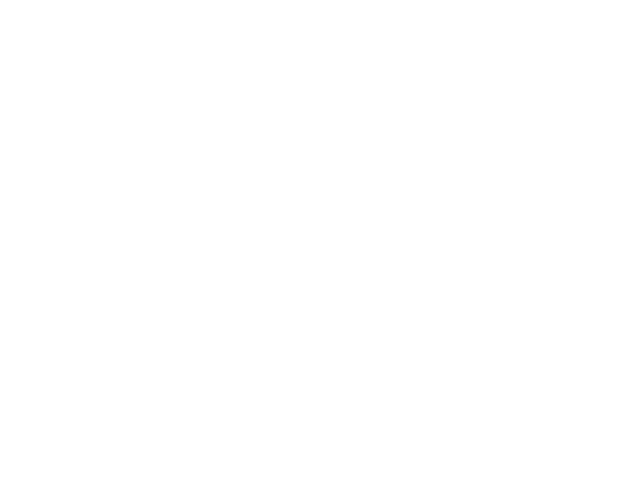

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5882: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 200 x 300)
  '(shape is %d x %d)' % inp.shape[::-1])


ValueError: color kwarg must have one color per dataset

In [6]:
#Run the function to get the sample from the data. 
S = 300
N = 200 
mu_1 = 85276.82
sig_1 = 17992.54
cut_lb_1 = 0.0
cut_ub_1 = 145000.0

unif_vals_1 = sts.uniform.rvs(0, 1, size=(N, S))
draws_1 = trunc_norm_draws(unif_vals_1, mu_1, sig_1,cut_lb_1, cut_ub_1)

mean_sim, var_sim = data_moments(draws_1)

print(mean_sim)
print(var_sim)

mean_mod = mean_sim.mean()
var_mod = var_sim.mean()

print('Estimated model mean =', mean_mod)
print('Estimated model variance =', var_mod)

#Plot the Histogram
count_d, bins_d, ignored_d = plt.hist(pts, 30, normed=True, color='b', label='Data')

count_m, bins_m, ignored_m = plt.hist(draws_1, 30, normed=True, color='r',label='Simulated data')

xvals = np.linspace(0, 145000, 150000)

plt.plot(xvals, trunc_norm_pdf(xvals, mu_1, sig_1, cut_lb_1, cut_ub_1),linewidth=2, color='k', label='PDF')

plt.title('Income of Students', fontsize=20)
plt.xlabel('Income')
plt.ylabel('Percent of studnets')
plt.xlim([0, 140000])  
plt.legend(loc='upper left')


<h4>d. Perform the two-step SMM estimator</h4>

In [14]:
#Create the criterion function 
def err_vec(data_vals, sim_vals, mu, sigma, cut_lb, cut_ub, simple):
    
    mean_data, var_data = data_moments(data_vals)
    moms_data = np.array([[mean_data], [var_data]])
    mean_sim, var_sim = data_moments(sim_vals)
    mean_model = mean_sim.mean()
    var_model = var_sim.mean()
    moms_model = np.array([[mean_model], [var_model]])
    
    if simple:
        err_vec = moms_model - moms_data
    
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

def criterion(params, *args):
    
    mu, sigma = params
    xvals, unif_vals, cut_lb, cut_ub, W_hat = args
    sim_vals = trunc_norm_draws(unif_vals, mu, sigma, cut_lb, cut_ub)
    err = err_vec(xvals, sim_vals, mu, sigma, cut_lb, cut_ub,
                  simple=False)
    
    crit_val = np.dot(np.dot(err.T, W_hat), err) 
    
    return crit_val

mu_test = 85279.25
sig_test = 319170892.54
cut_lb = 0.0
cut_ub = 100000.0

unif_vals_2 = sts.uniform.rvs(0, 1, size=(N, S))
sim_vals = trunc_norm_draws(unif_vals_1, mu_test, sig_test, cut_lb_1, cut_ub_1)
mean_sim, var_sim = data_moments(sim_vals)
mean_mod = mean_sim.mean()
var_mod = var_sim.mean()

print(mean_mod, var_mod)
err_vec(pts, sim_vals, mu_test, sig_test, cut_lb, cut_ub, simple=False)
crit_test = criterion(np.array([mu_test, sig_test]), pts, unif_vals_1, 0.0, 145000.0, np.eye(2))

print(crit_test)

72535.6473307 1740458023.88
[[ 19.17378344]]


mu_SMM1_1= 72535.6473541  sig_SMM1_1= 1740458023.88
Data mean of scores = 85276.8236063 , Data variance of scores = 323731572.23
Model mean 1 = 49938.2308613 , Model variance 1 = 828917282.447
Error vector 1 = [-0.41439856  1.56050801]
      fun: array([[ 1.99463283]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.33590924e-05,   0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 6
      nit: 1
   status: 0
  success: True
        x: array([  7.25356474e+04,   1.74045802e+09])


<IPython.core.display.Javascript object>


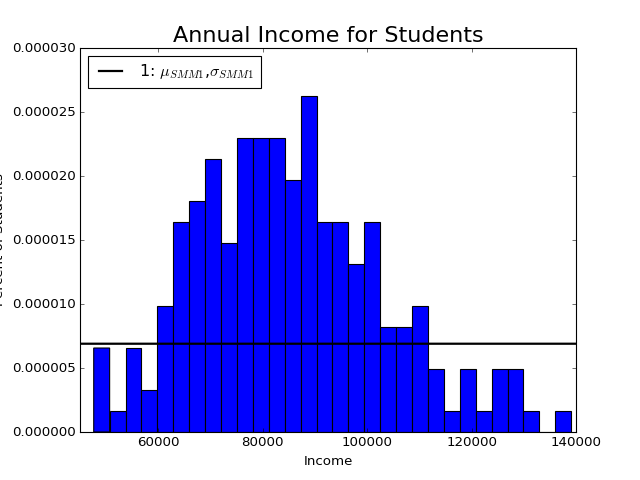

array([  47628.56063612,   50676.92033321,   53725.28003029,
         56773.63972738,   59821.99942447,   62870.35912155,
         65918.71881864,   68967.07851573,   72015.43821281,
         75063.7979099 ,   78112.15760699,   81160.51730407,
         84208.87700116,   87257.23669825,   90305.59639533,
         93353.95609242,   96402.31578951,   99450.67548659,
        102499.03518368,  105547.39488077,  108595.75457785,
        111644.11427494,  114692.47397203,  117740.83366912,
        120789.1933662 ,  123837.55306329,  126885.91276038,
        129934.27245746,  132982.63215455,  136030.99185164,
        139079.35154872])

In [18]:
mu_init_1 = 72535.6473307
sig_init_1 = 1740458023.88
params_init_1 = np.array([mu_init_1, sig_init_1])
W_hat1_1 = np.eye(2)
smm_args1_1 = (pts, unif_vals_2, 0.0, 450.0, W_hat1_1)
results1_1 = opt.minimize(criterion, params_init_1, args=(smm_args1_1),
                          method='L-BFGS-B',
                          bounds=((1e-10, None), (1e-10, None)))
mu_SMM1_1, sig_SMM1_1 = results1_1.x
print('mu_SMM1_1=', mu_SMM1_1, ' sig_SMM1_1=', sig_SMM1_1)

mean_data, var_data = data_moments(pts)
print('Data mean of scores =', mean_data, ', Data variance of scores =', var_data)
sim_vals_1 = trunc_norm_draws(unif_vals_2, mu_SMM1_1, sig_SMM1_1, cut_lb, cut_ub)
mean_sim_1, var_sim_1 = data_moments(sim_vals_1)
mean_model_1 = mean_sim_1.mean()
var_model_1 = var_sim_1.mean()
err_1 = err_vec(pts, sim_vals_1, mu_SMM1_1, sig_SMM1_1, cut_lb, cut_ub,
                False).reshape(2,)

print('Model mean 1 =', mean_model_1, ', Model variance 1 =', var_model_1)
print('Error vector 1 =', err_1)
print(results1_1)

# Plot the histogram of the data
count, bins, ignored = plt.hist(pts, 30, normed=True)
plt.title('Annual Income for Students', fontsize=20)
plt.xlabel('Income')
plt.ylabel('Percent of Students')
plt.xlim([45000, 140000]) 

# Plot the estimated SMM PDF
dist_pts = np.linspace(0, 145000, 1500000)
plt.plot(dist_pts, LN_pdf(dist_pts, mu_SMM1_1, sig_SMM1_1, 0.0, 145000.0),
         linewidth=2, color='k', label='1: $\mu_{SMM1}$,$\sigma_{SMM1}$')
plt.legend(loc='upper left')
bins